<center><img src="https://minas.medellin.unal.edu.co/images/Escudo_color.png" width="300"></center>

### **<center> <h2><strong>Reconocimiento de señales de tránsito y semaforos</strong></h2> </center>**

<center> <t>[Names]<t> </center>


# <center> <h5><strong>Introducción</strong></h5> </center>


<center> <h4><strong>Contexto</strong></h4> </center>
<p style='text-align: justify'>
    Este proyecto de visión artificial está diseñado para implementarse en un robot móvil, el <a href="https://www.waveshare.com/wave-rover.htm">Wave Rover</a>, equipado con una <a href="https://www.raspberrypi.com/products/raspberry-pi-4-model-b/">Raspberry Pi 4</a> y <a href="https://www.raspberrypi.com/products/camera-module-v2/">Raspberry Pi Camera Module 2</a>, permitiendo el procesamiento de imágenes y videos en tiempo real. Su objetivo es reconocer señales de tráfico y semáforos utilizando técnicas de visión computacional como procesamiento de imágenes y videos, así como el uso de redes neuronales convolucionales. La iniciativa busca mejorar la navegación autónoma del robot y contribuir al desarrollo de la conducción autónoma, empleando la base de datos <a href="https://benchmark.ini.rub.de/">GTSRB</a> (German Traffic Sign Recognition Benchmark), que nos suministra miles de imágenes etiquetadas para entrenar modelos precisos y eficientes. Además, se integrarán algoritmos para detectar estados de semáforos en imágenes estáticas y secuencias de vídeo. Este sistema es ideal para vehículos autónomos y sistemas de asistencia a la conducción. Uno de los objetivo primordiales es diseñar y entrenar modelos de redes neuronales convolucionales (CNN), que puedan identificar y clasificar con precisión una amplia gama de señales de tránsito y los estados de los semáforos en diferentes condiciones ambientales y situaciones de tráfico. Se contempla la recopilación de un extenso dataset que incluya imágenes de señales y semáforos bajo diversas condiciones de iluminación, clima y obstrucciones visuales, lo que permitirá al modelo entrenarse en escenarios que reflejen la complejidad del mundo real. Además, el proyecto abordará el desafío de la integración de estos sistemas de reconocimiento en plataformas de hardware existentes en vehículos.
<p>

<center> <h4><strong>Tecnologia usada</strong></h4> </center>
<p style='text-align: justify'>
    Este proyecto implementa tecnologías como Docker, Conda, Jupyter Notebook, JupyterLab, OpenCV y TensorFlow para asegurar compatibilidad y facilidad de manejo de versiones a través de una imagen de Docker basada en Conda. Configuramos un entorno virtual en Conda con todas las dependencias necesarias, permitiendo la ejecución en cualquier sistema operativo compatible con Docker. Centralizamos todas las funciones en un archivo llamado <a href="https://github.com/GGomezMorales/artificial_vision_project/blob/main/artificial-vision-project/util.py">util.py</a>, diseñado para claridad estructural del proyecto y facilidad de uso, empleando diversas bibliotecas para las operaciones y la lógica requerida. A pesar de la robustez en el manejo de errores y el diseño orientado a objetivos generales, las funciones aún necesitan ser documentadas.
<p>

<p style='text-align: justify'>
    Es importante destacar que todo el proceso se lleva a cabo dentro de un contenedor de Docker. Este contenedor está configurado para integrar un entorno Conda, que contiene todas las dependencias necesarias para el proyecto. Esta configuración permite el uso directo y eficiente del proyecto desde un IDE como Visual Studio Code.
<p>

<p style='text-align: justify'>
    <strong>¿Por qué usar Docker?</strong> Esta tecnología ofrece una plataforma consistente para el desarrollo, lo que elimina los problemas de <i>"funciona en mi máquina"</i> al garantizar que el software se ejecute de manera idéntica en cualquier entorno. Docker facilita la gestión de dependencias y la configuración necesaria para operar el proyecto, asegurando que todas las herramientas y librerías, como OpenCV y TensorFlow, funcionen en un entorno aislado y controlado.
<p>


# <center> <h5><strong>Adquisición de imágenes</strong></h5> </center>


<p style='text-align: justify'>
    El German Traffic Sign Benchmark es un desafío de clasificación multiclase de una sola imagen celebrado en la International Joint Conference on Neural Networks (IJCNN) 2011. Tiene las siguientes propiedades:
<p>

<ul>
    <li>Problema de clasificación multiclase de una sola imagen</li>
    <li>Más de 40 clases</li>
    <li>Más de 50.000 imágenes en total</li>
    <li>Base de datos amplia y realista</li>
</ul>

<p style='text-align: justify'>
    El German Traffic Sign Recognition Benchmark (GTSRB) es un conjunto de datos fundamental para el desarrollo de sistemas de reconocimiento de señales de tráfico, esencial para aplicaciones como la conducción autónoma y los sistemas de asistencia al conductor.
<p>

<p style='text-align: justify'>
    GTSRB fue creado por el Instituto de Neuroinformática de la Universidad Ruhr de Bochum, Alemania, y se presentó oficialmente en 2011 durante una competencia en la Conferencia Internacional Conjunta sobre Redes Neuronales (IJCNN). Su objetivo es apoyar el desarrollo y la evaluación de sistemas automáticos para la detección y reconocimiento de señales de tráfico en condiciones reales.
<p>

<p style='text-align: justify'>
    El conjunto de datos contiene más de 50,000 imágenes y abarca 43 clases diferentes de señales de tráfico, que incluyen límites de velocidad, señales de advertencia y signos prohibitivos, entre otros. Las imágenes varían en tamaño, forma y apariencia, e incluyen desafíos como oclusiones parciales, diversas condiciones de iluminación y diferentes distancias y ángulos de captura de la cámara. Cada imagen está acompañada de anotaciones que especifican la clase y las coordenadas del cuadro delimitador de la señal dentro de la imagen.
<p>

<p style='text-align: justify'>
    El GTSRB se divide en un conjunto de entrenamiento con 39,209 imágenes y un conjunto de pruebas con 12,630 imágenes. Esto permite evaluar la eficacia de los modelos entrenados en un entorno controlado. Las anotaciones adicionales incluyen etiquetas de clase y coordenadas de cuadros delimitadores, que son cruciales para tareas de segmentación y reconocimiento.
<p>

<p style='text-align: justify'>
    
<p>


In [33]:
from util import *
from IPython.display import Image, clear_output

<p style='text-align: justify'>
    Creamos una carpeta denominada `/.kaggle` que se utiliza para almacenar las credenciales necesarias para interactuar con los datasets de Kaggle a través de la línea de comandos.
<p>


In [34]:
# ! mkdir -p /.kaggle
# ! cp res/kaggle.json /.kaggle/

# clear_output()

<p style='text-align: justify'>
    Procedimos a descargar el archivo comprimido en una carpeta denominada `/datasets`. Una vez descargado, descomprimimos el contenido y, posteriormente, eliminamos el archivo comprimido para optimizar el espacio de almacenamiento.
<p>


In [35]:
# ! kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign -p /datasets
# ! cd /datasets && mkdir -p data-traffic-sign && cd data-traffic-sign && unzip /datasets/gtsrb-german-traffic-sign.zip
# ! rm /datasets/gtsrb-german-traffic-sign.zip

# clear_output()

# <center> <h5><strong>Preprocesamiento de las imágenes</strong></h5> </center>

<p style='text-align: justify'>
    
<p>


<p style='text-align: justify'>
    Implementaremos varios métodos de preprocesamiento de manera individual para evaluar su impacto y eficacia en la mejora de nuestras imágenes. Posteriormente, integraremos los métodos más efectivos en una secuencia optimizada para lograr el mejor resultado posible. Los datos favorables obtenidos de cada método serán almacenados en arrays, lo que nos permitirá utilizarlos en etapas posteriores del análisis.
<p>


### **Imágenes de prueba**

<p style='text-align: justify'>
    Cargamos y mostramos las imágenes que se utilizarán en el análisis, disponibles tanto en formato RGB como en escala de grises para facilitar diferentes tipos de evaluación. Estas imágenes se han elegido al azar de nuestro dataset.
<p>


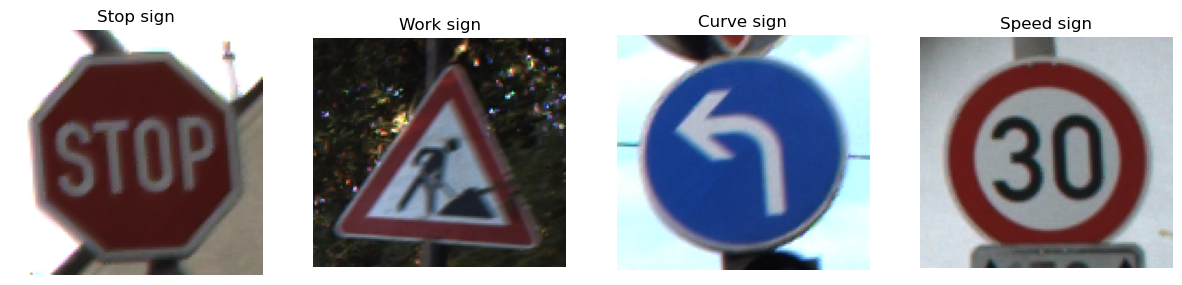

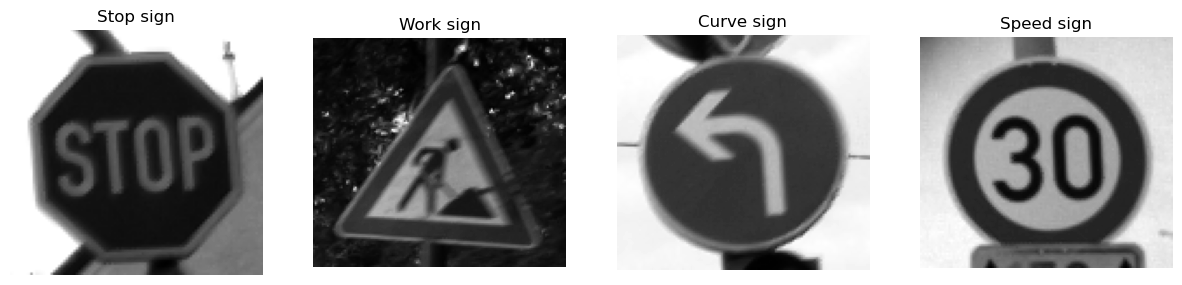

In [36]:
stop_sign_image = image_read('images/00093.png')
work_sign_image = image_read('images/00153.png')
curve_sign_image = image_read('images/00433.png')
speed_sign_image = image_read('images/00284.png')

stop_sign_image_gray = image_read('images/00093.png', 'gray')
work_sign_image_gray = image_read('images/00153.png', 'gray')
curve_sign_image_gray = image_read('images/00433.png', 'gray')
speed_sign_image_gray = image_read('images/00284.png', 'gray')

images_name = ["Stop sign", "Work sign", "Curve sign", "Speed sign"]

original_images = [
    stop_sign_image,
    work_sign_image,
    curve_sign_image,
    speed_sign_image
]

original_images_gray = [
    stop_sign_image_gray,
    work_sign_image_gray,
    curve_sign_image_gray,
    speed_sign_image_gray
]

# Remember to add the traffic light images

subplot_images(
    images=original_images,
    images_name=images_name
)

subplot_images(
    images=original_images_gray,
    images_name=images_name
)

<p style='text-align: justify'>
    La primera observación notable sobre las imágenes es su baja resolución y, en algunos casos, altos niveles de ruido. Al examinar individualmente cada imagen, notamos que sus dimensiones varían entre 50x50 y 300x300 píxeles. Esto hace que el uso de un filtro sea adecuado para aplicar técnicas de suavizado y eliminación de ruido. Además, se implementa una técnica avanzada para mejorar la resolución.
<p>


### **Eliminación de ruido**

<p style='text-align: justify'>
    Inicialmente, implementaremos un filtro promedio no local para reducir el ruido, con el objetivo principal de mejorar la resolución y eliminar el ruido de las imágenes.
<p>


In [37]:
denoised_images = []

for image in original_images:
    denoised_image = reduce_noise(image, 10, 10, 7, 32)
    denoised_images.append(denoised_image)

<p style='text-align: justify'>
    A continuación, compararemos los resultados obtenidos después de aplicar el filtro de reducción de ruido a las imágenes originales en color RGB.
<p>


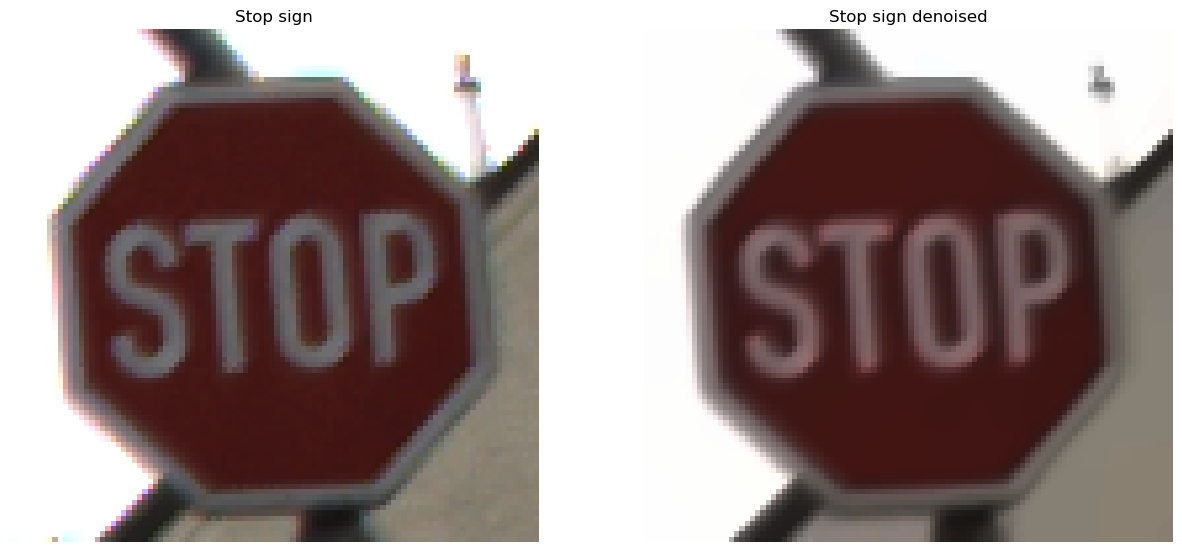

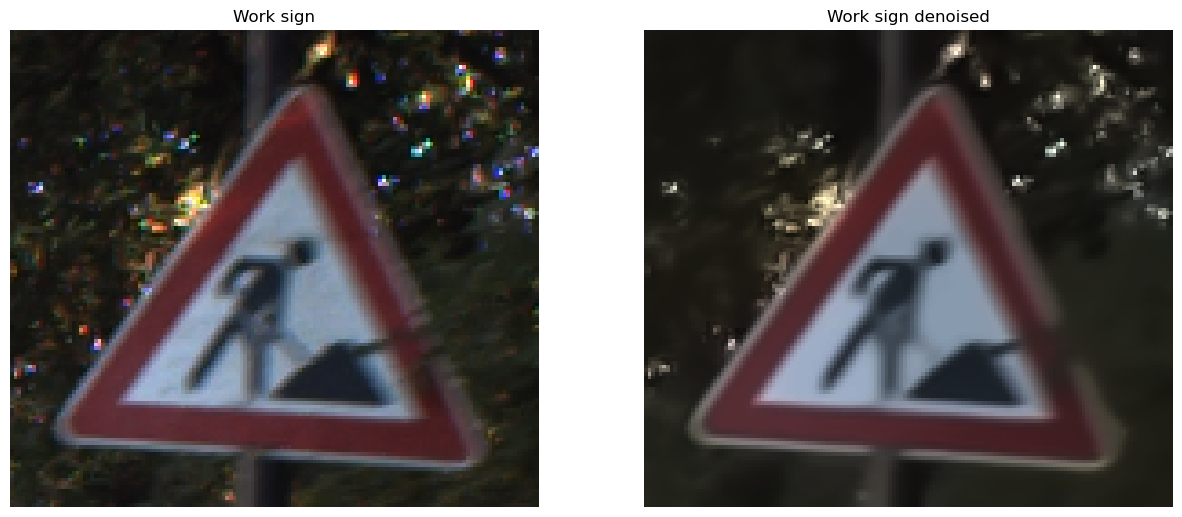

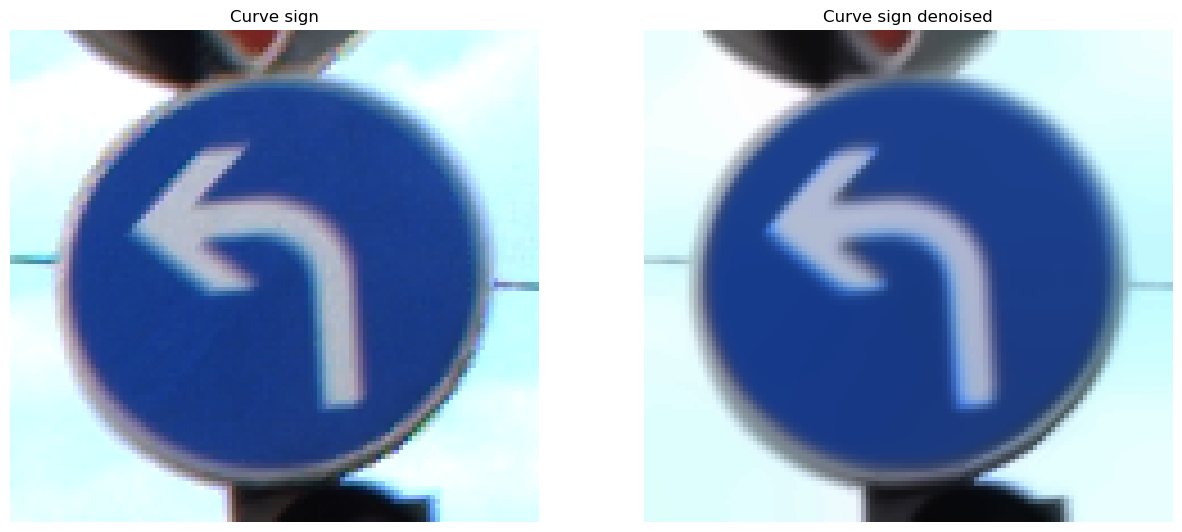

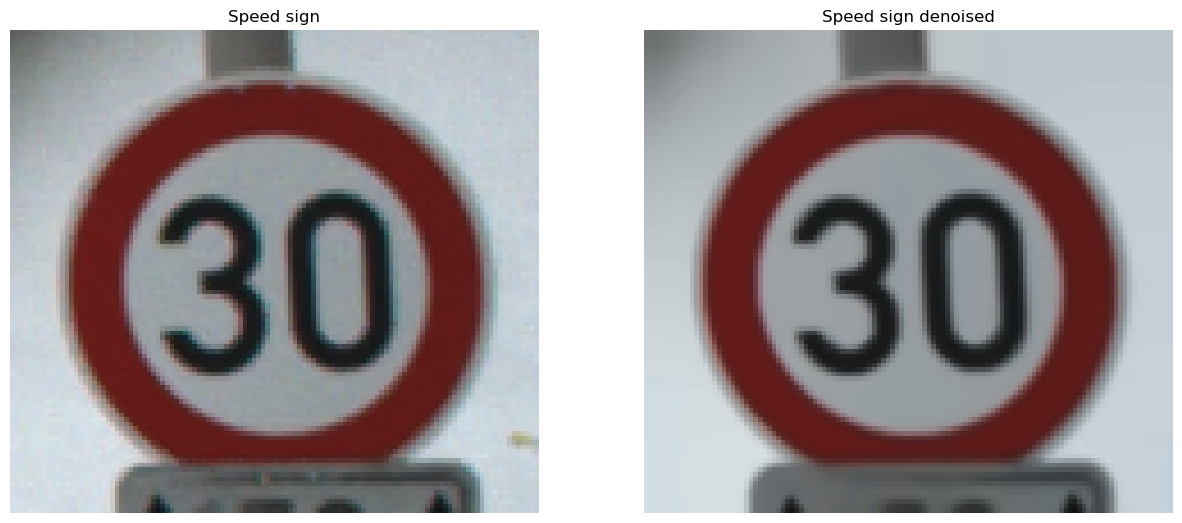

In [38]:
for i in range(len(images_name)):
    subplot_images(
        images=[original_images[i], denoised_images[i]],
        images_name=[images_name[i], f"{images_name[i]} denoised"]
    )

### **Mejorar la resolución**

<p style='text-align: justify'>
    Aplicaremos una técnica avanzada basada en redes neuronales residuales para la superresolución de imágenes. Estos modelos son capaces de mejorar la calidad de imágenes borrosas o de baja resolución. Utilizan técnicas especiales que permiten a la red aprender a agregar detalles y mejorar la nitidez de las imágenes de manera eficiente. En nuestro caso, utilizaremos el modelo preentrenado EDSR.
<p>

<p style='text-align: justify'>
    El primer paso consiste en descargar el modelo.
<p>


In [39]:
! wget -P ~/ https://github.com/Saafke/EDSR_Tensorflow/raw/master/models/EDSR_x2.pb

clear_output()

In [40]:
enhance_resolution_images = []

for image in original_images:
    enhance_resolution_image = enhance_resolution(image, 2, '/root/EDSR_x2.pb')
    enhance_resolution_images.append(enhance_resolution_image)

clear_output()

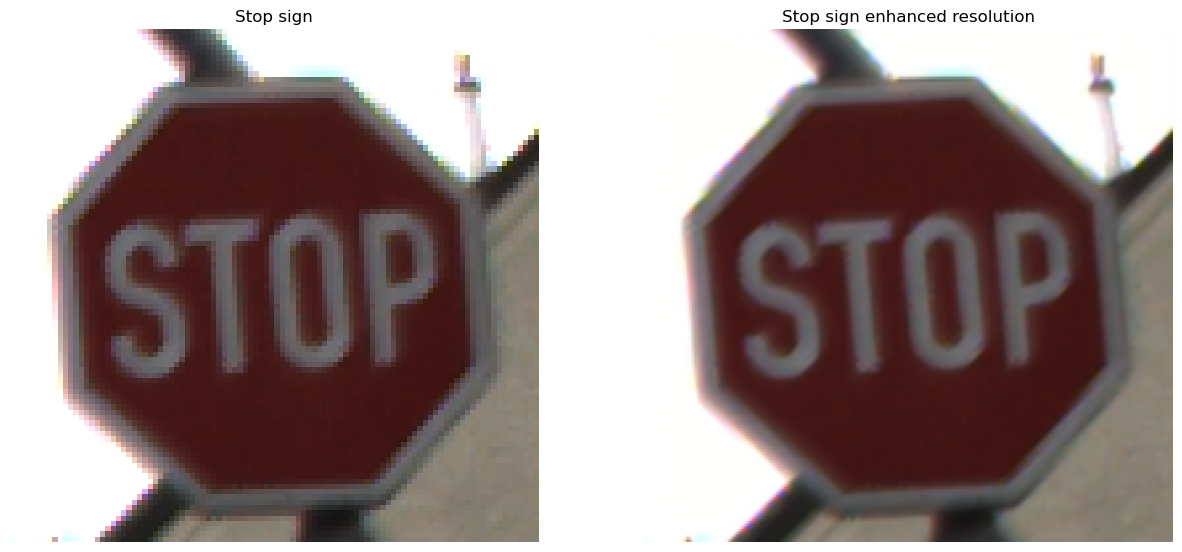

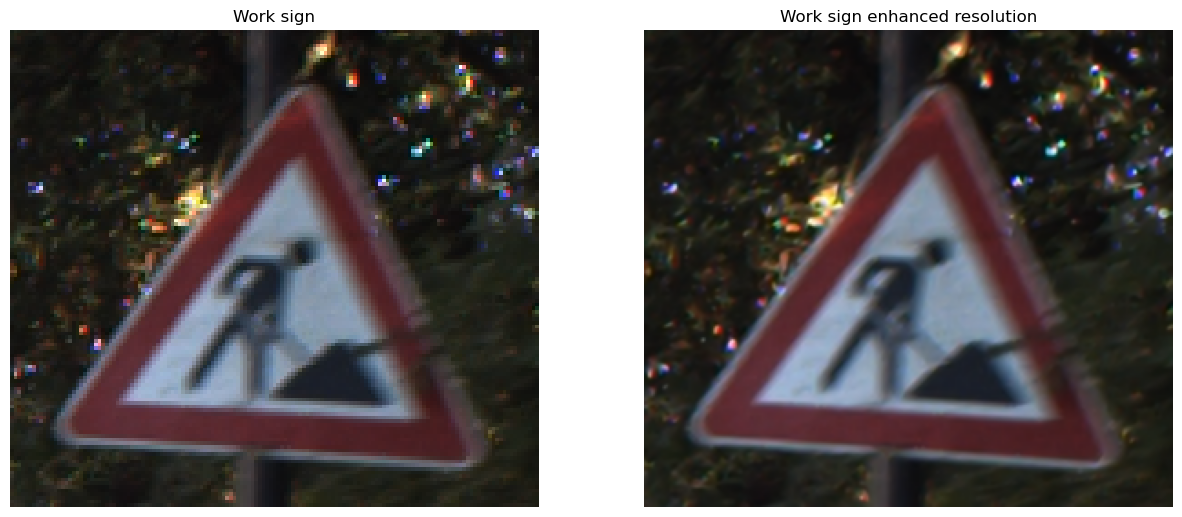

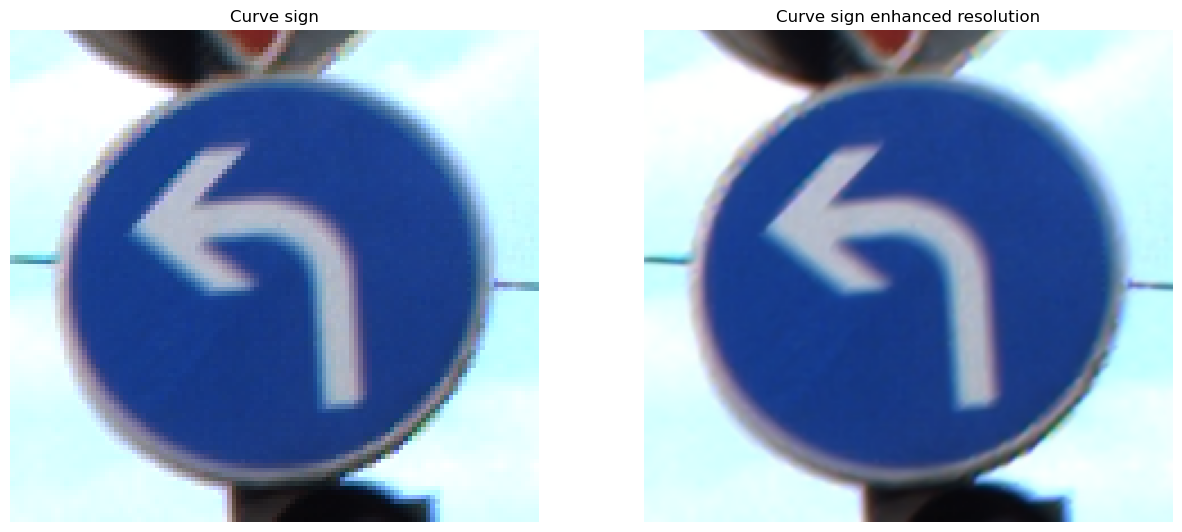

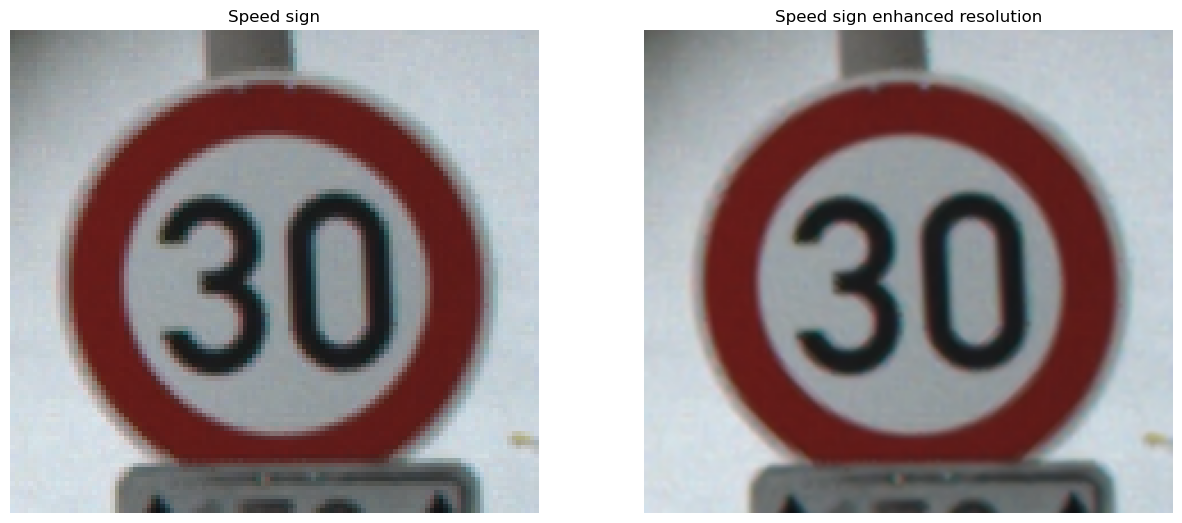

In [41]:
for i in range(len(images_name)):
    subplot_images(
        images=[original_images[i], enhance_resolution_images[i]],
        images_name=[images_name[i], f"{images_name[i]} enhanced resolution"]
    )

### **Espacio de colores**

<p style='text-align: justify'>
    Exploraremos diversos espacios de color en una de las imagenes para determinar su utilidad en nuestro análisis.
<p>


/artificial-vision-project/util.py:238: RuntimeWarning: overflow encountered in ubyte_scalars
  channel_H = (blue - red) * 60 / \
/artificial-vision-project/util.py:241: RuntimeWarning: overflow encountered in ubyte_scalars
  channel_H = (red - green) * 60 / \
/artificial-vision-project/util.py:235: RuntimeWarning: overflow encountered in ubyte_scalars
  channel_H = (green - blue) * 60 / \


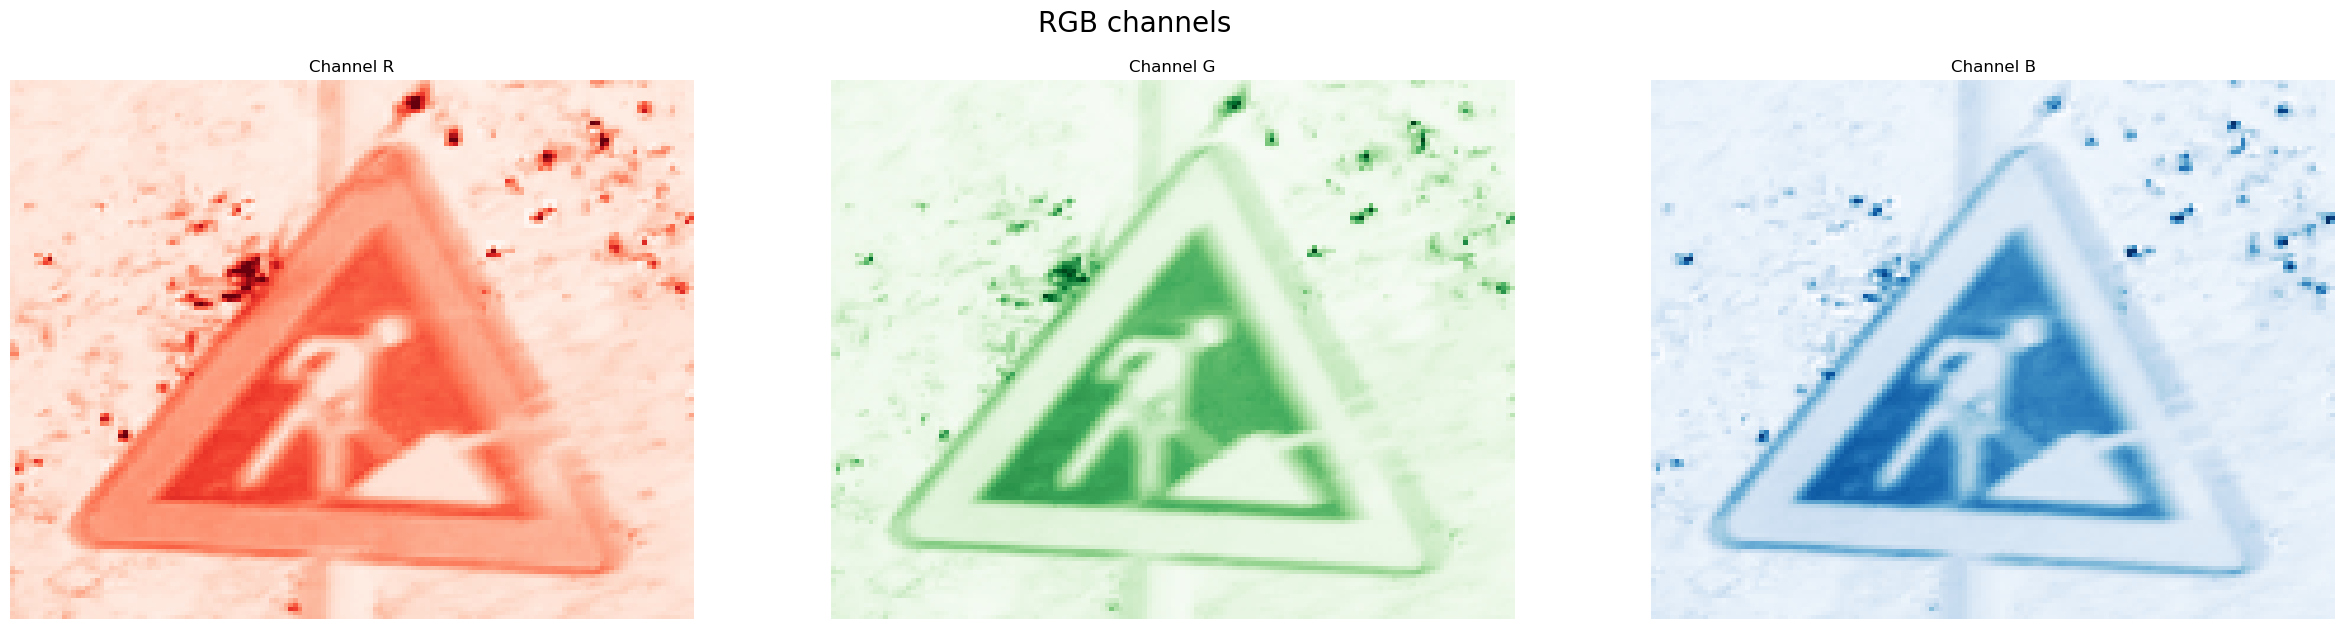

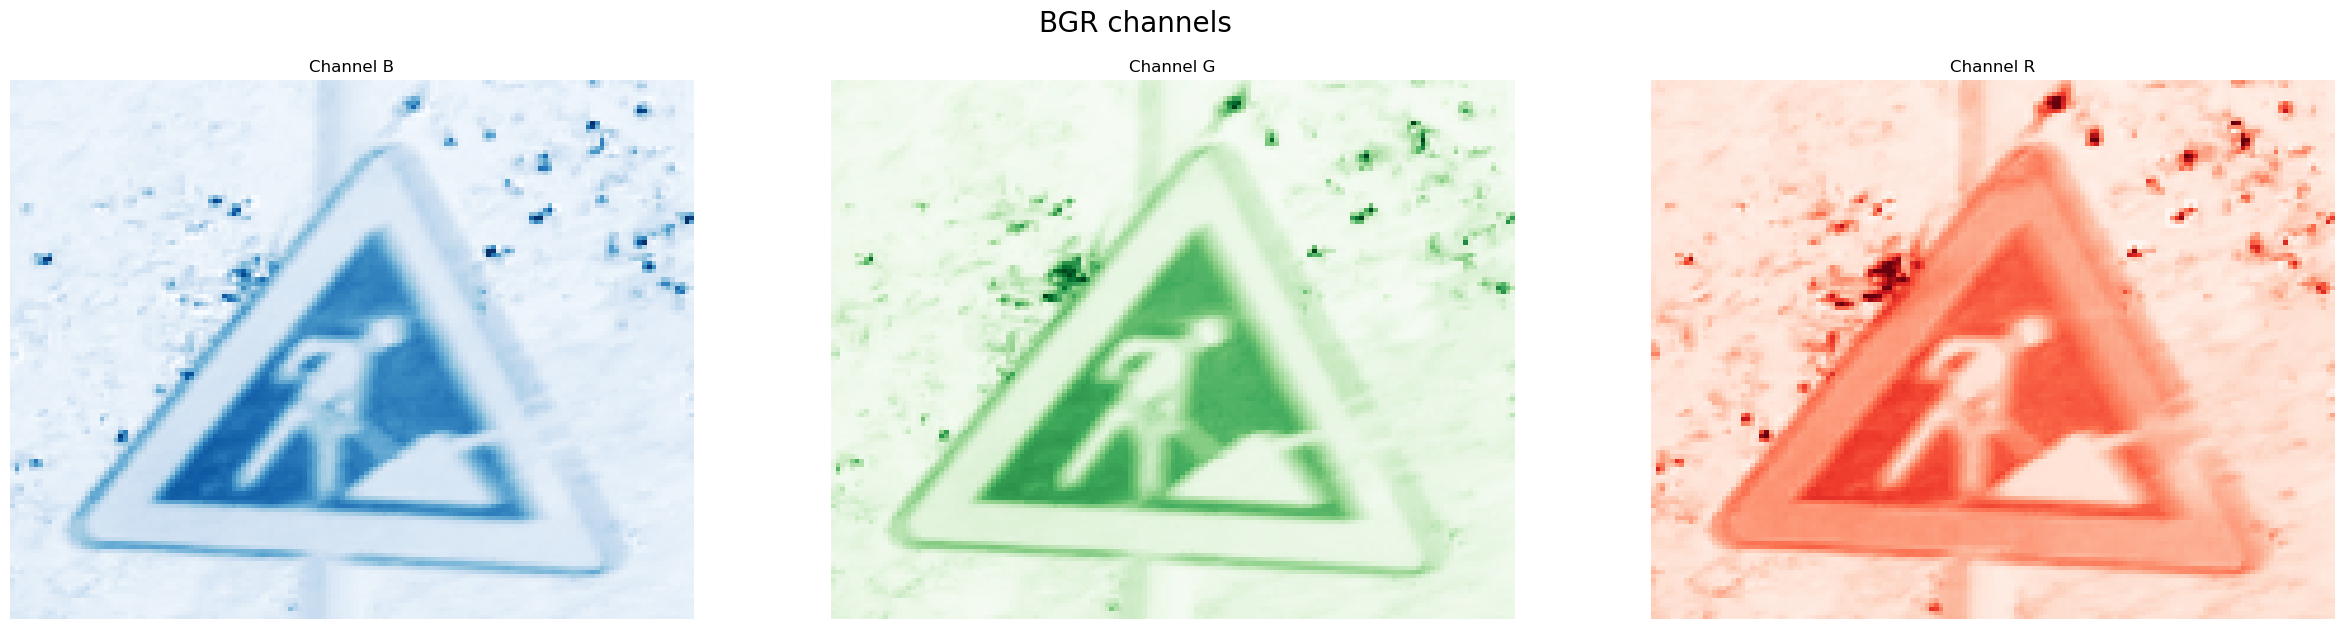

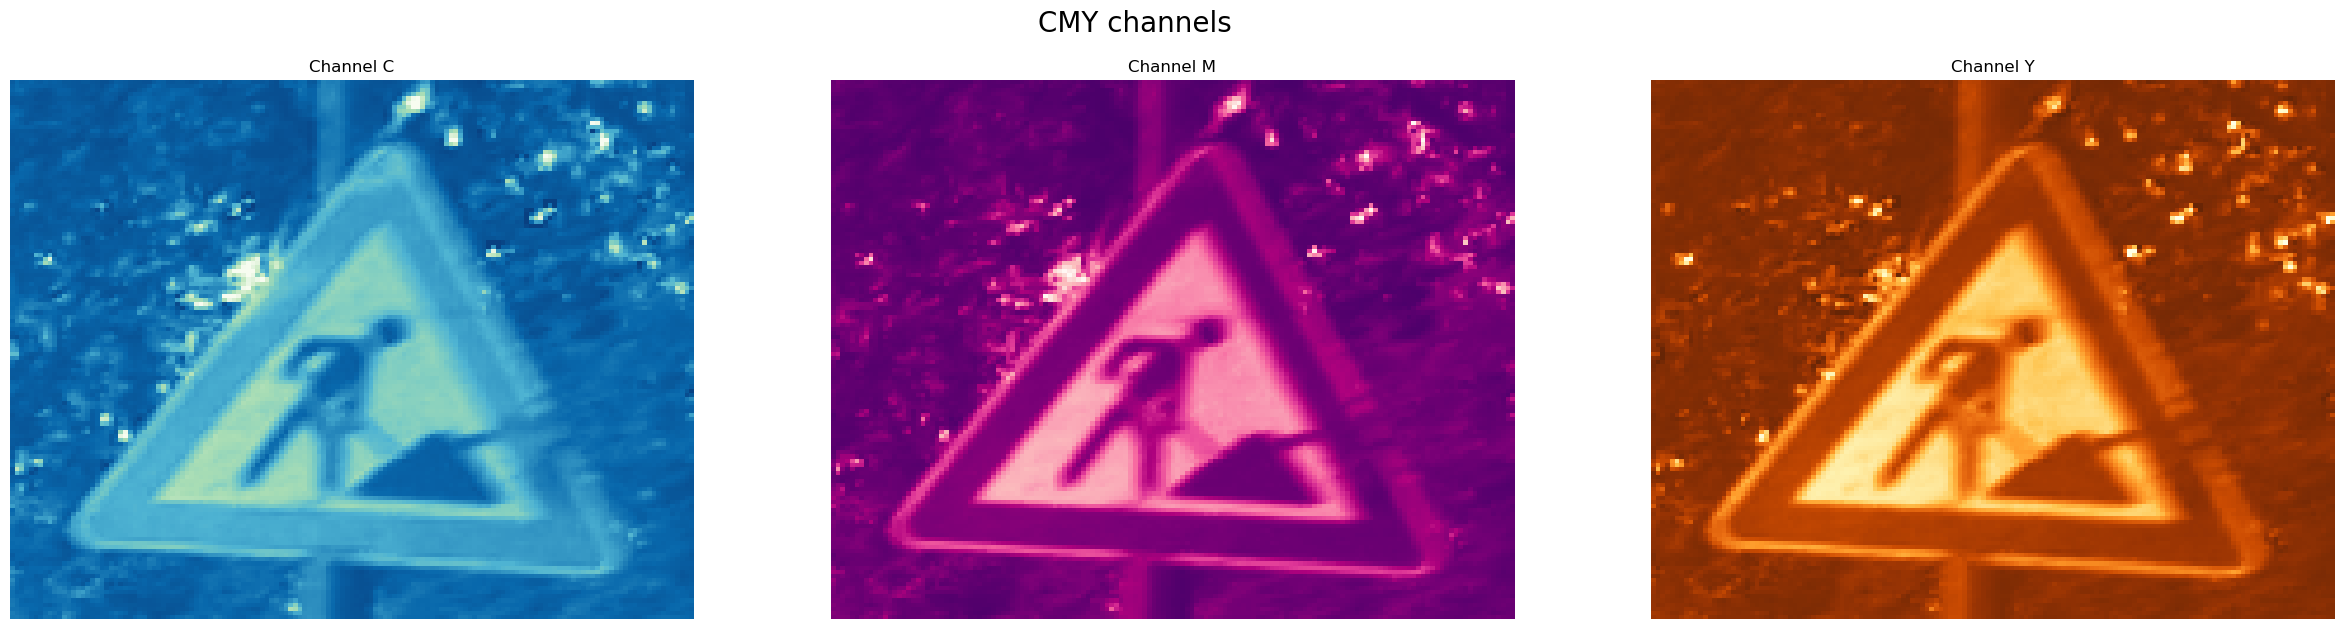

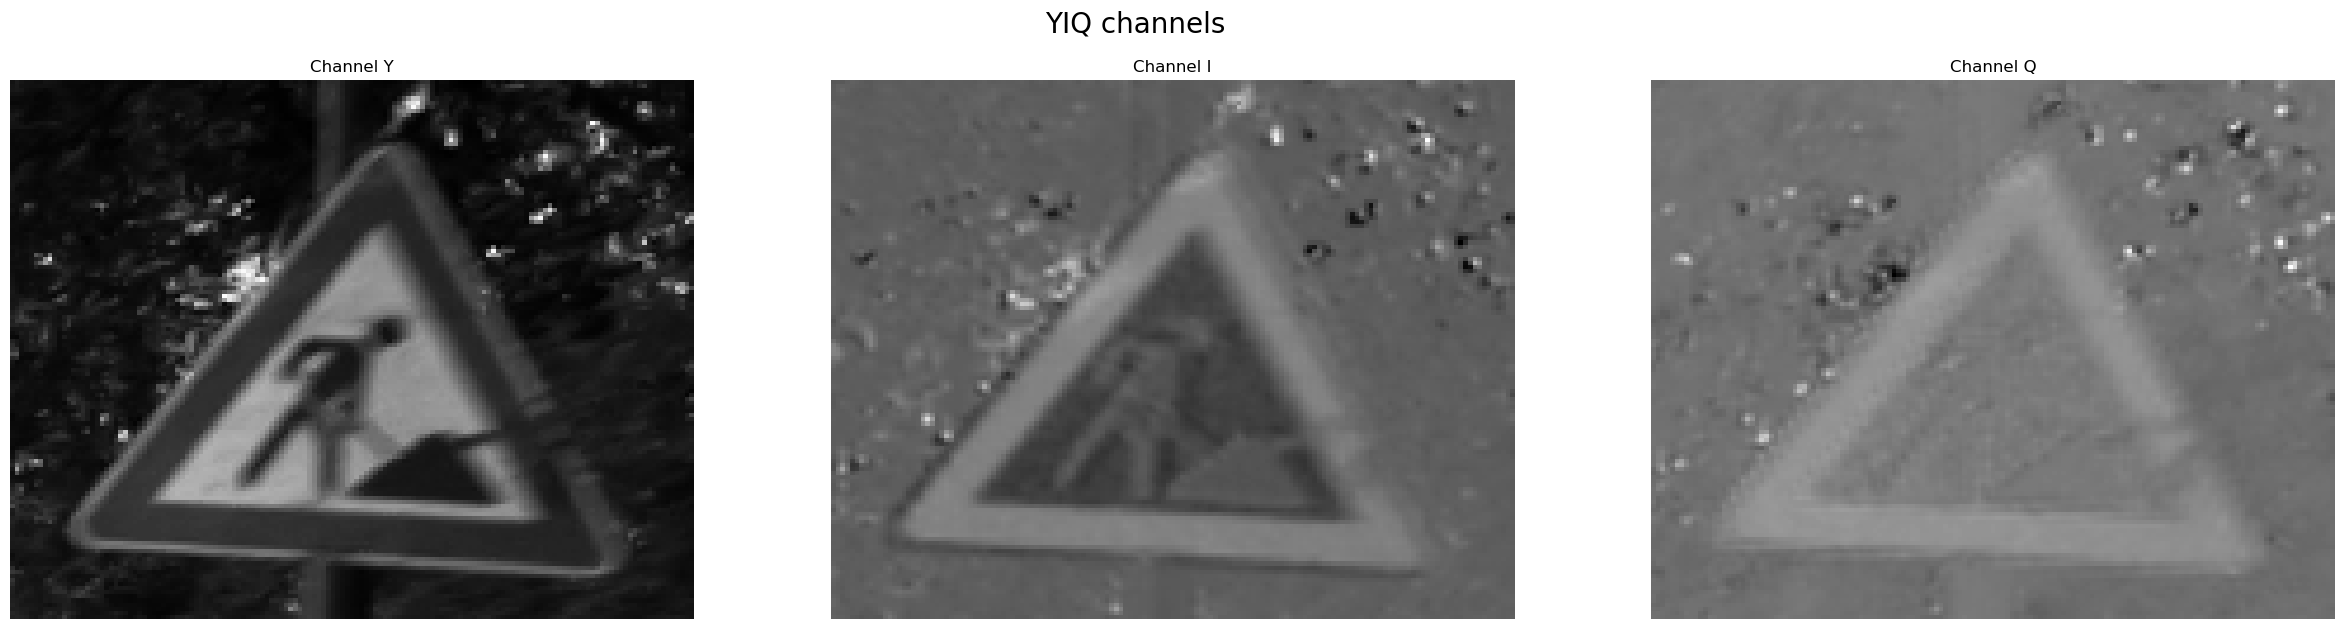

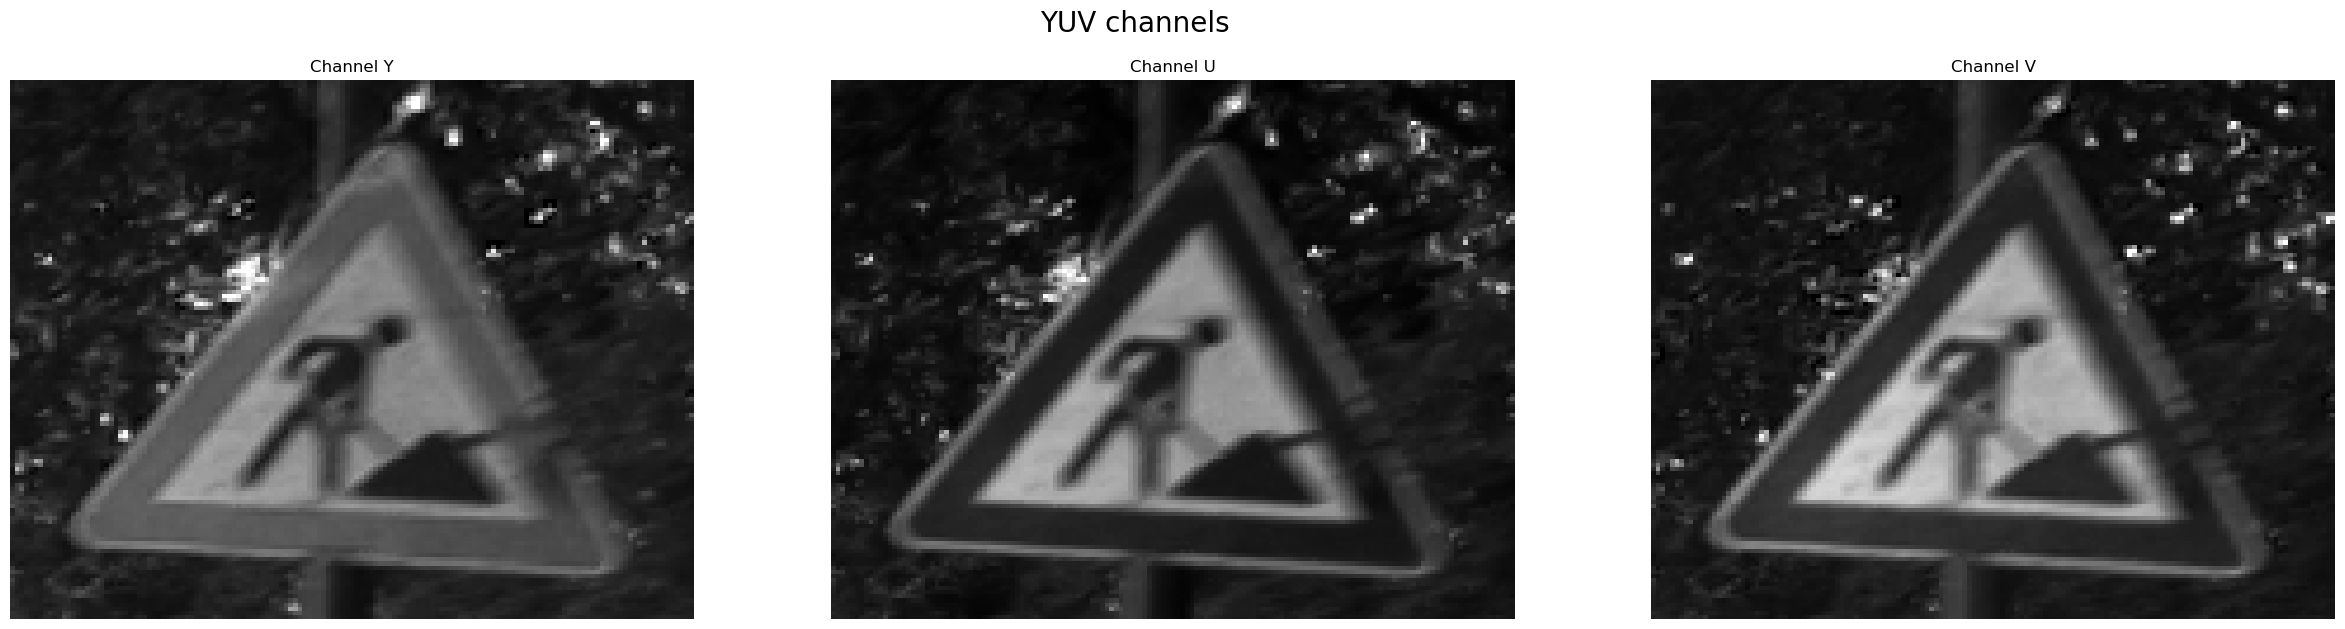

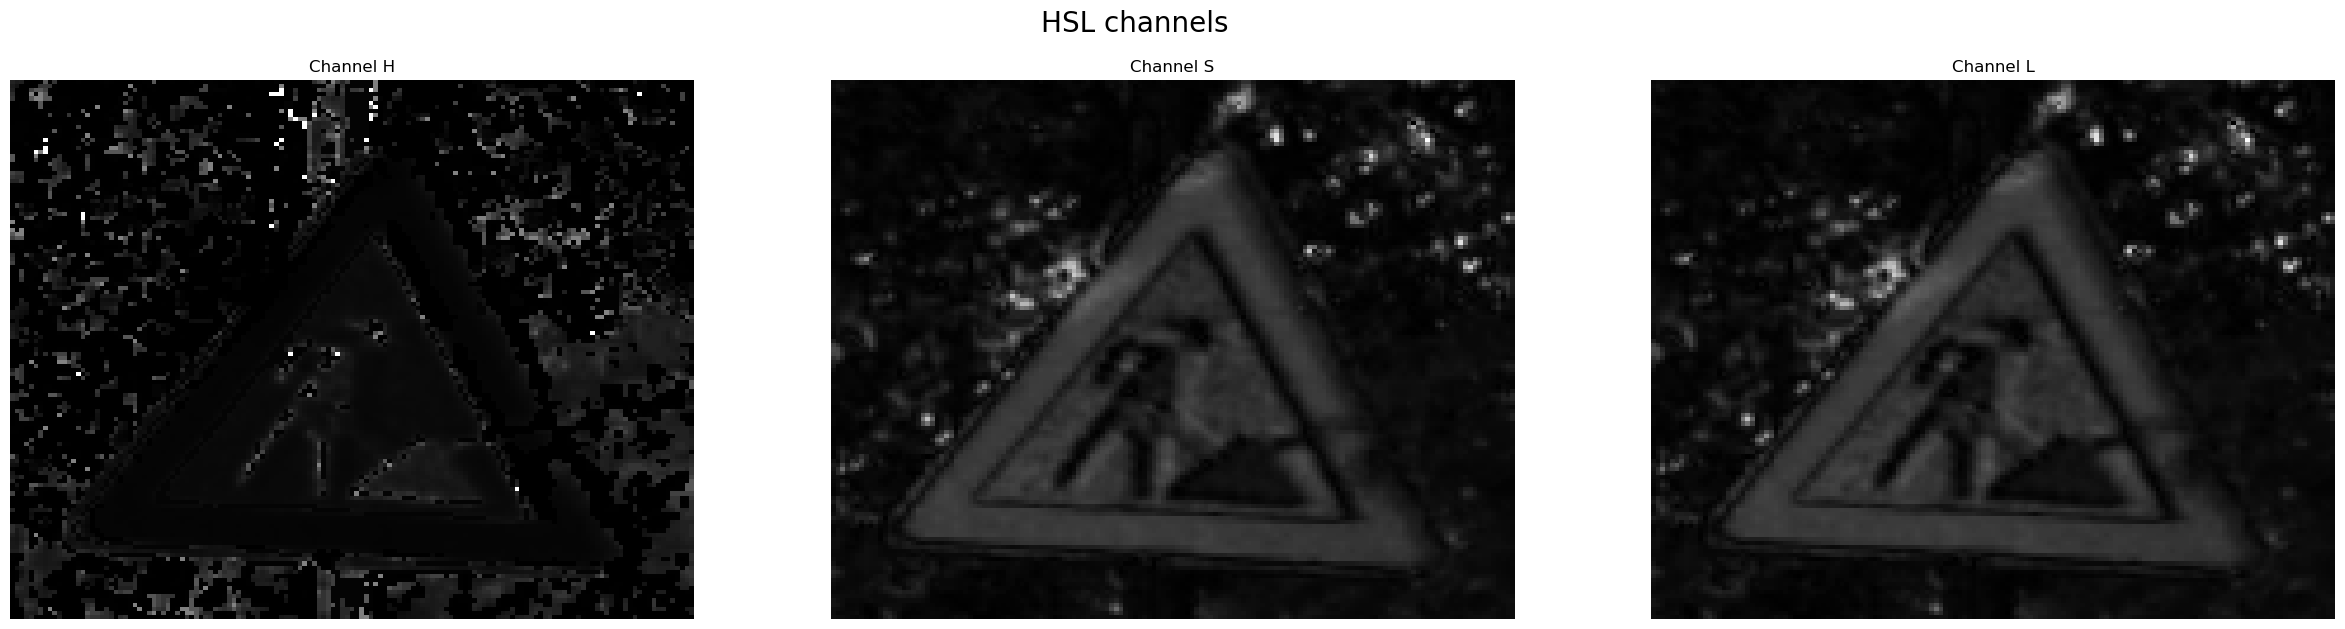

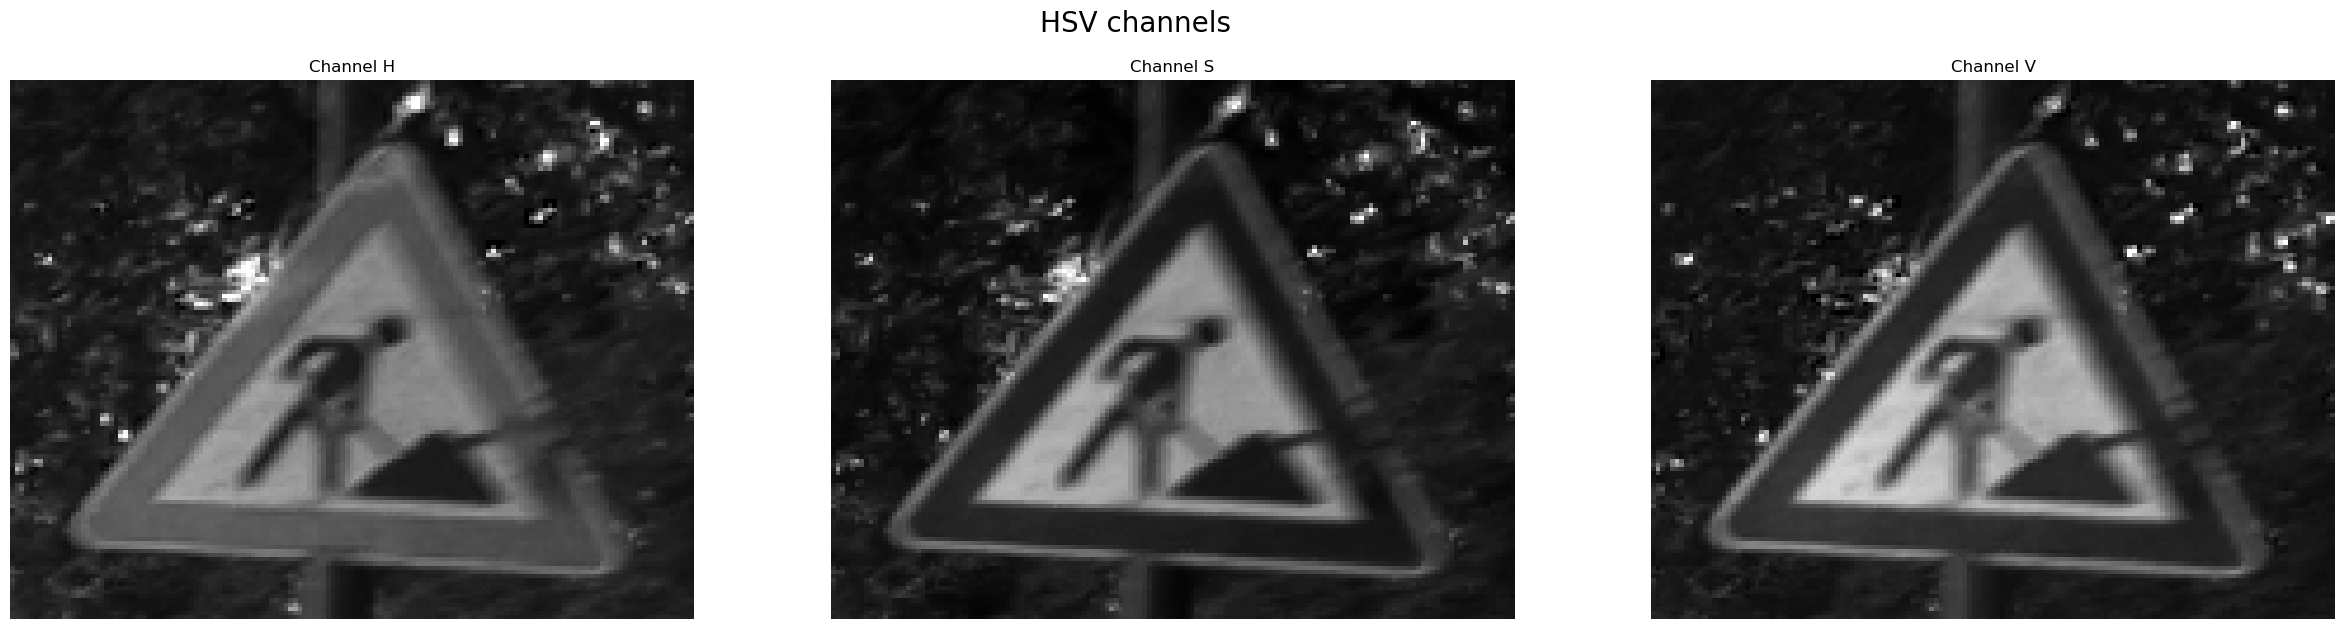

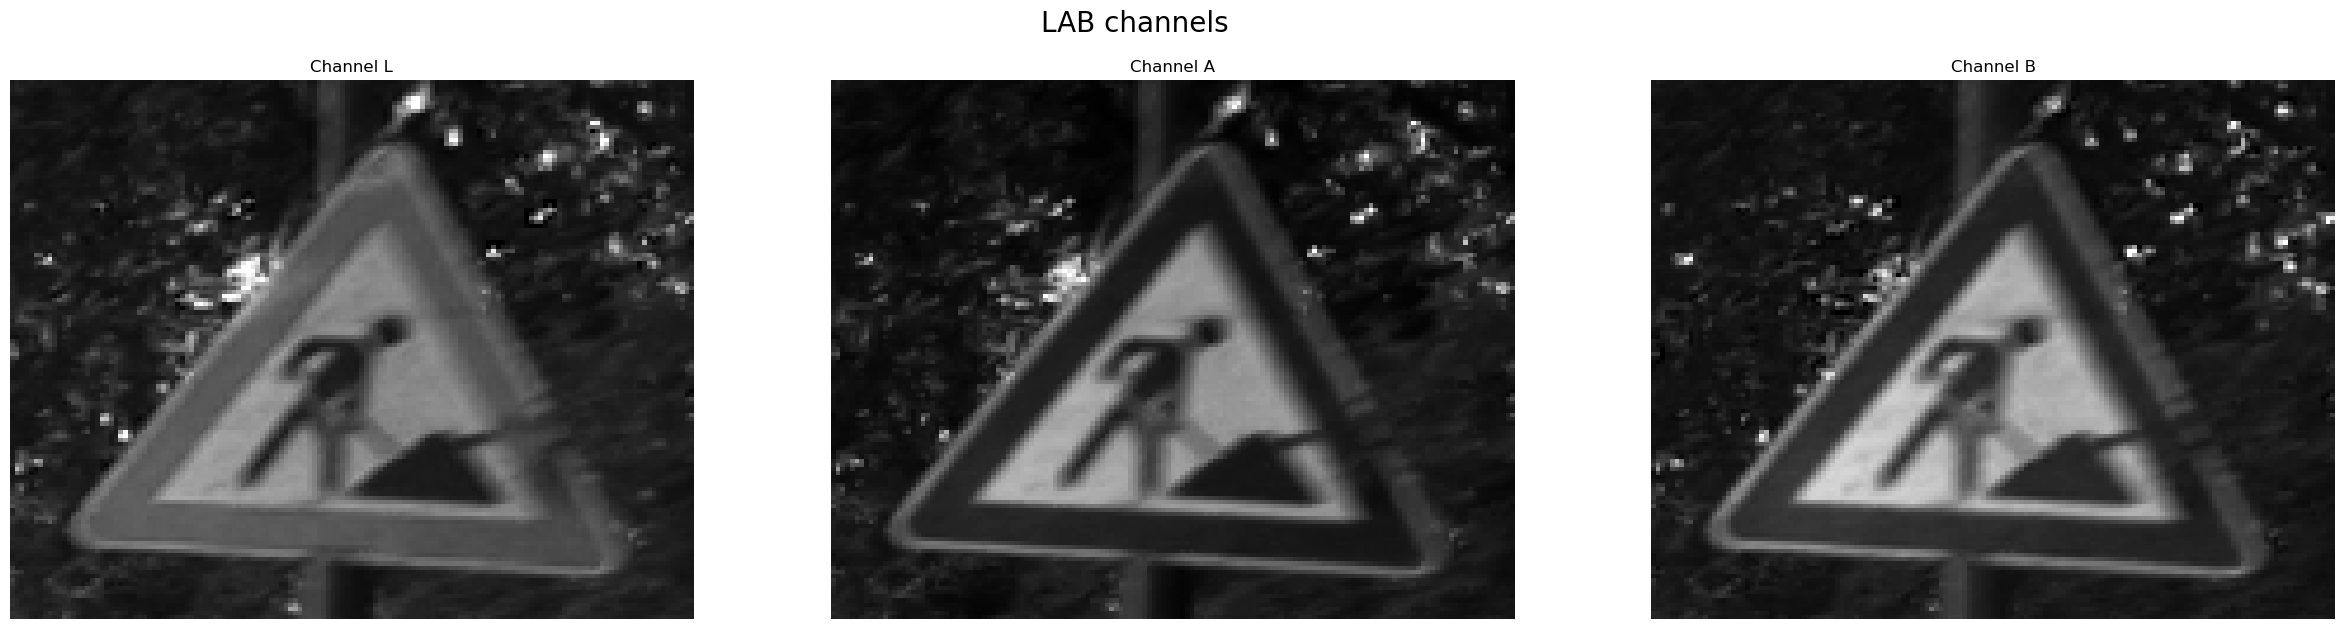

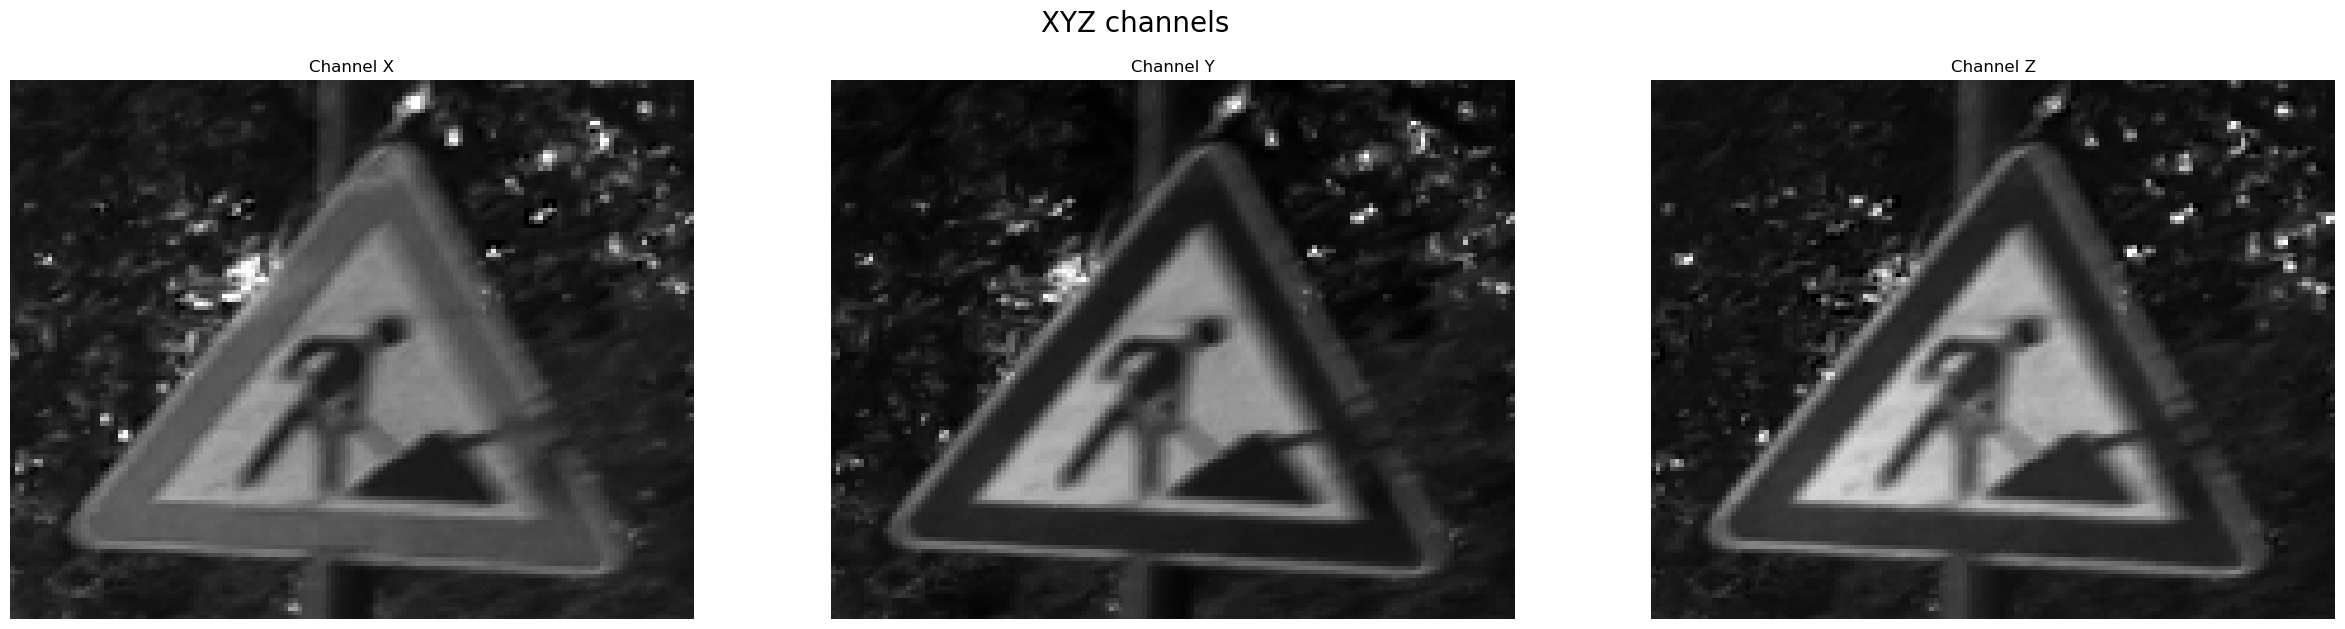

In [42]:
color_space = ["rgb", "bgr", "cmy", "yiq", "yuv", "hsl", "hsv", "lab", "xyz"]
for mode in color_space:
    plot_channels(
        image=work_sign_image,
        mode=mode,
        title=f"{mode.upper()} channels"
    )

<p style='text-align: justify'>
    Como resultado de nuestra evaluación, identificamos que, aunque diversos espacios de color pueden contribuir a nuestro análisis, no son suficientes para alcanzar los resultados óptimos. Entre los espacios y canales evaluados, el canal Y del espacio de color YIQ, que representa la luminancia o componente de brillo de la imagen, mostró potencial. Sin embargo, hemos decidido descartar esta técnica para nuestro análisis específico, dado que no se alinea completamente con nuestros objetivos de procesamiento de imagen.
<p>

<p style='text-align: justify'>
    Por ello, decidimos enfocarnos en otras técnicas que incluyen procesos de restauración, filtrado y transformación para mejorar la calidad de las imágenes.
<p>


## **Metodos de preprocesamiento**

<p style='text-align: justify'>
    Es importante analizar que las imágenes no presentan una nitidez adecuada y carecen de iluminación suficiente. Para mejorar su calidad, aplicaremos una serie de técnicas como filtros, correcciones de iluminación, ajustes basados en histogramas y métodos destinados a aumentar la nitidez de las imágenes
<p>


### **Filtrado**

<p style='text-align: justify'>
    Iniciaremos aplicando diversos filtros para evaluar su comportamiento mediante diferentes métodos de filtrado. Tras un análisis detallado, observamos que los filtros aplicados no produjeron cambios significativos en las imágenes, con la excepción de los filtros mínimos y máximos.
<p>


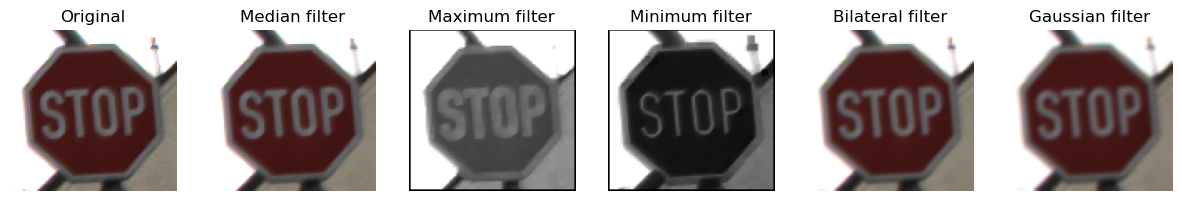

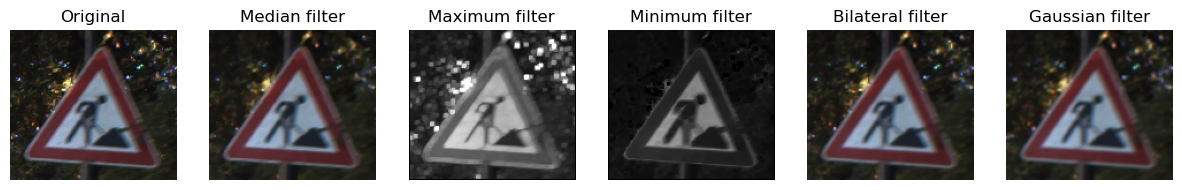

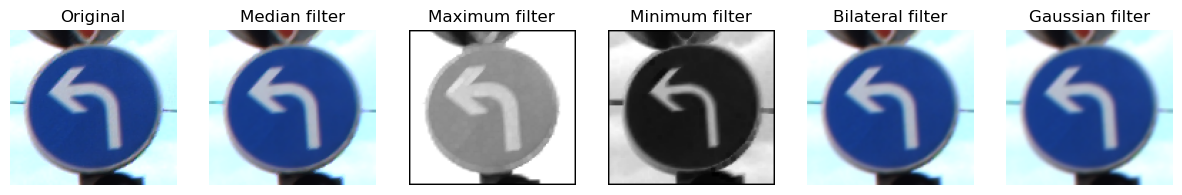

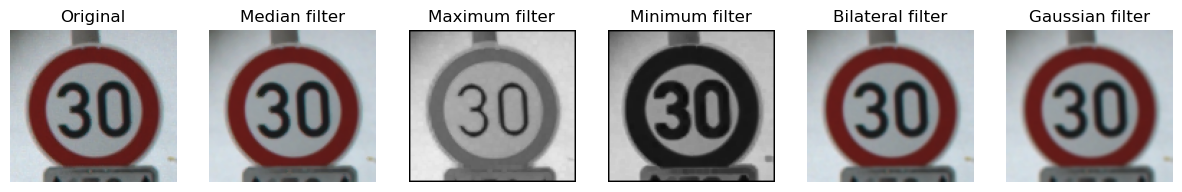

In [43]:
for image in original_images:
    size = 3
    subplot_images(
        images=[
            image,
            median_filter(image, size),
            maximum_filter(image, size),
            minimum_filter(image, size),
            bilateral_filter(image, size, 250, 250),
            gaussian_filter(image, size, 250),
        ],
        images_name=[
            "Original",
            "Median filter",
            "Maximum filter",
            "Minimum filter",
            "Bilateral filter",
            "Gaussian filter",
        ]
    )

### **Corrección gamma**


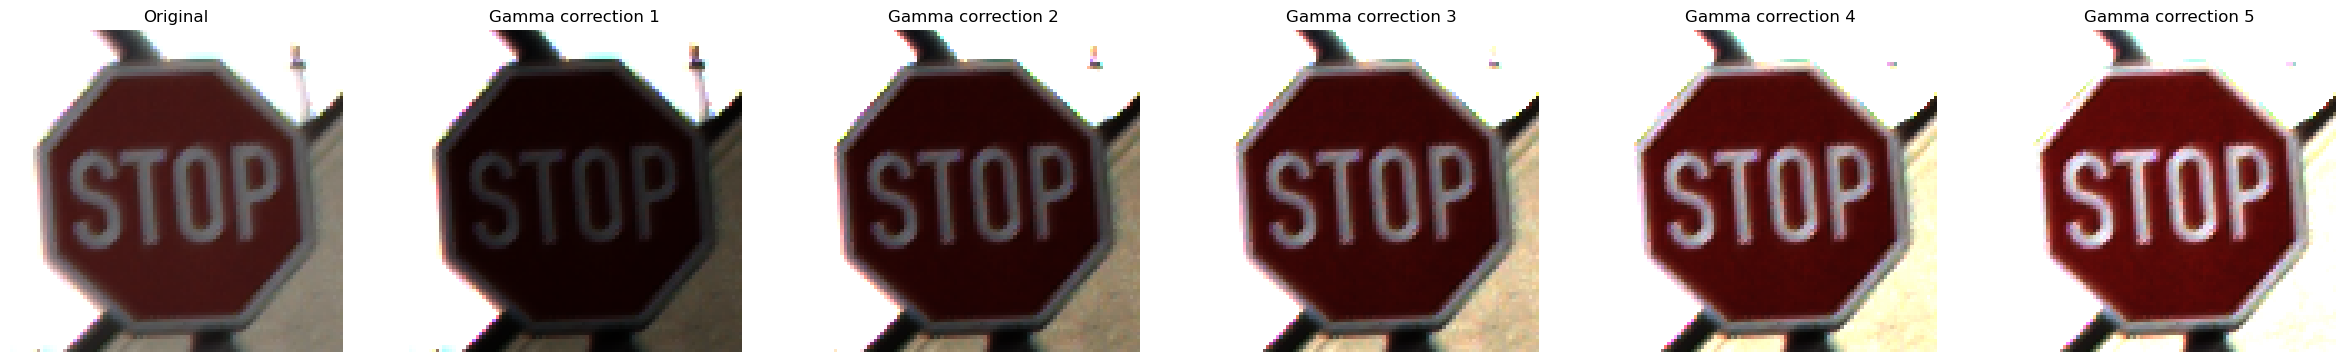

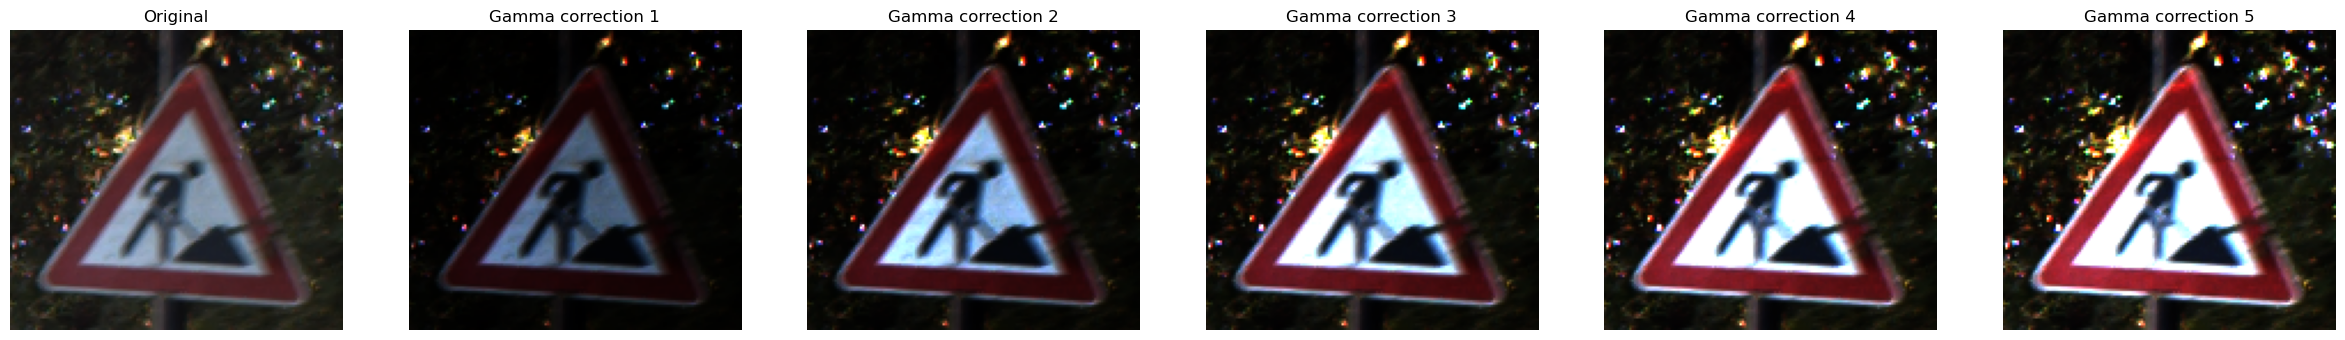

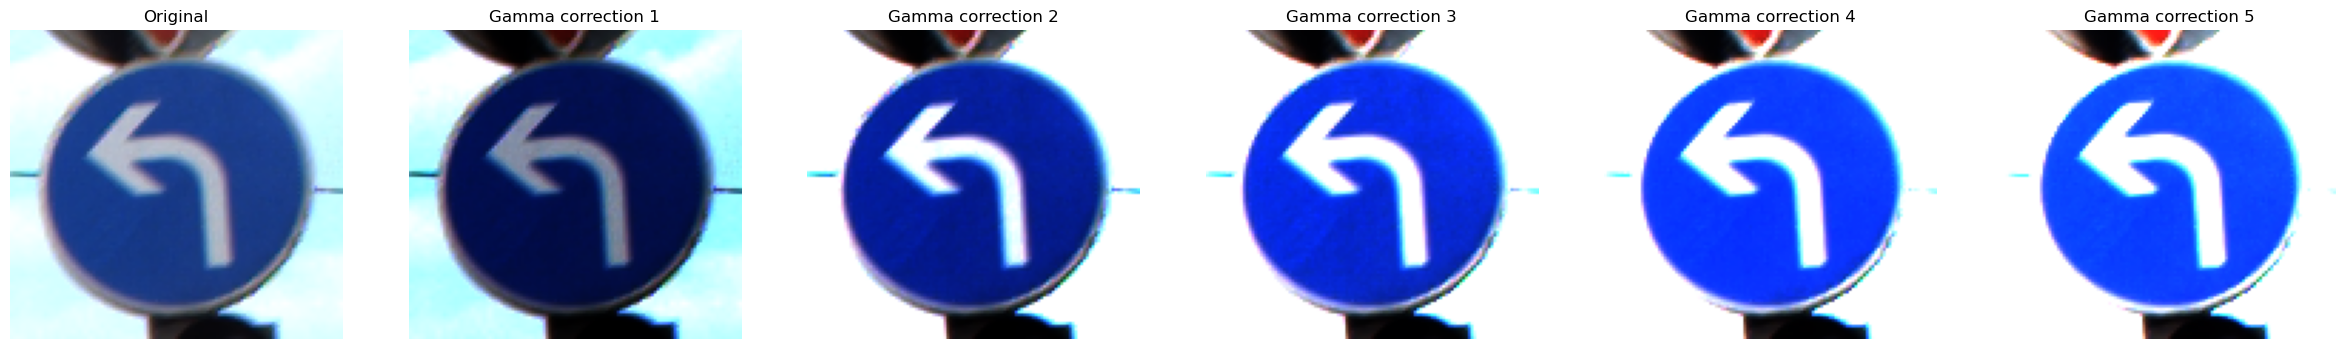

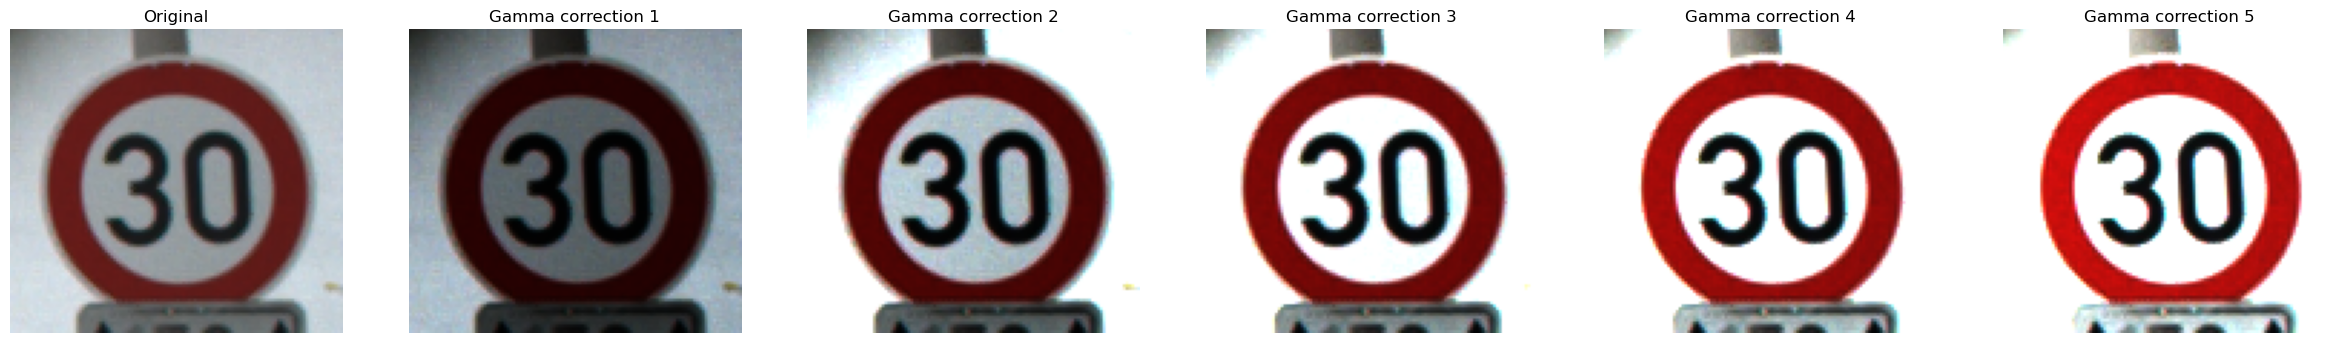

In [44]:
for image in original_images:
    images_list = [image]
    images_name = ["Original"]
    for i in range(1, 6):
        image_result = apply_transformation_on_rgb(
            image, gamma_correction, [i, 2])
        images_list.append(image_result)
        images_name.append(f"Gamma correction {i}")
    subplot_images(
        images=images_list,
        images_name=images_name,
        figsize=(30, 5)
    )